In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\time_series\perrin-freres-monthly-champagne.csv')

In [17]:
df.columns = ['Month','Sales']

In [18]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [20]:
df.drop(106, axis = 0, inplace = True)
df.drop(105, axis = 0, inplace = True)

In [21]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [22]:
# now convert string to datetime in Month column
df['Month'] = pd.to_datetime(df['Month'])

In [23]:
df

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [ ]:
df.set_index('Month', inplace = True)

In [26]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [27]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Visualize data

<AxesSubplot:xlabel='Month'>

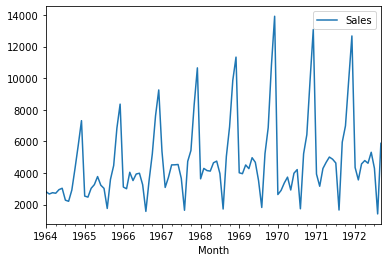

In [28]:
df.plot()

In [29]:
# check for data to be stationary or not

from statsmodels.tsa.stattools import adfuller

test_results = adfuller(df['Sales'])

In [30]:
# H0 : It is not Stationary 
# H1 : It is Stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Stats', 'p-value', 'Lags used', 'No. of Obs. used']
    
    for value, label in zip(result, labels):
        print(label+':'+str(value))
    
    if result[1] <= 0.05:
        print('Strong evidence against null hypothesis, Reject H0 null hypothesis')
    else:
        print('Weak evidence against null hypothesis, Accept H0 null hypothesis')
    

In [31]:
adfuller_test(df['Sales'])

ADF Test Stats:-1.8335930563276195
p-value:0.3639157716602467
Lags used:11
No. of Obs. used:93
Weak evidence against null hypothesis, Accept H0 null hypothesis


In [32]:
# now we do the differencing to make the data stationary.
# since the data is seasonal we do the differencing according to cycle which in this case is 12 months or 1 year, so we create a column

In [33]:
df['seasonal 1st diff'] = df['Sales']  -  df['Sales'].shift(12)

In [35]:
df.head(15)

,Sales,seasonal 1st diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [36]:
adfuller_test(df['seasonal 1st diff'].dropna())

ADF Test Stats:-7.626619157213162
p-value:2.060579696813685e-11
Lags used:0
No. of Obs. used:92
Strong evidence against null hypothesis, Reject H0 null hypothesis


<AxesSubplot:xlabel='Month'>

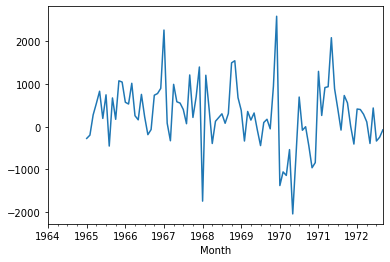

In [38]:
df['seasonal 1st diff'].plot()

## Auto Regressive model

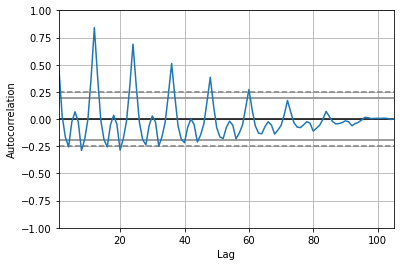

In [40]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Sales'])

plt.show()

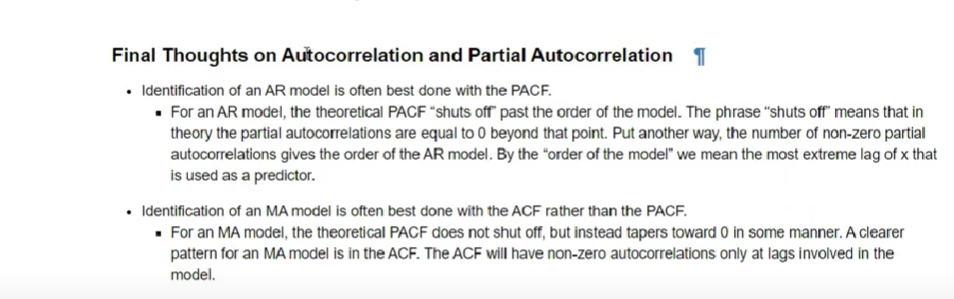


In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

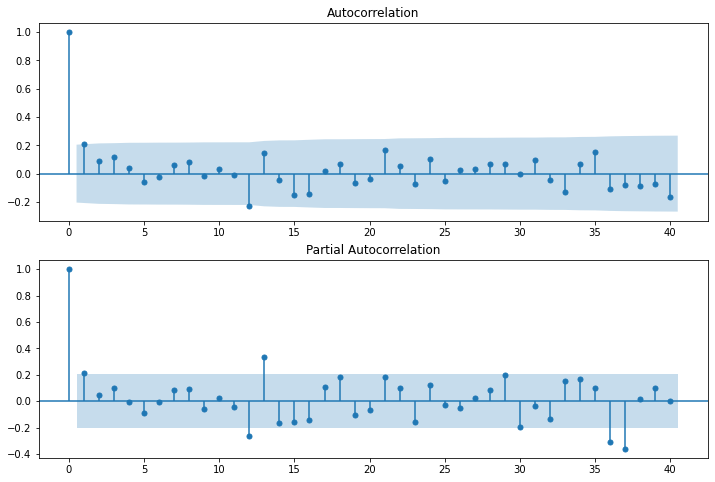

In [46]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['seasonal 1st diff'].iloc[13:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['seasonal 1st diff'].iloc[13:], lags = 40, ax = ax2)

In [47]:
# p = 1  (related to PACF sudden decrease or shut-down)
# d = 1  (related to number of differencing done)
# q = 0, 1  (related to gradual decrease  of points in ACF plot)

In [48]:
from statsmodels.tsa.arima_model import ARIMA    # only used for non-seasonal data (in this case data is seasonal, so this wont work for arima but we will still try)

In [50]:
model1 = ARIMA(df['Sales'], order = (1,1,1))

model1_fit = model1.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [52]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sat, 10 Sep 2022   AIC                           1910.251
Time:                        18:00:24   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7846     12.405      1.837      0.066      -1.529      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

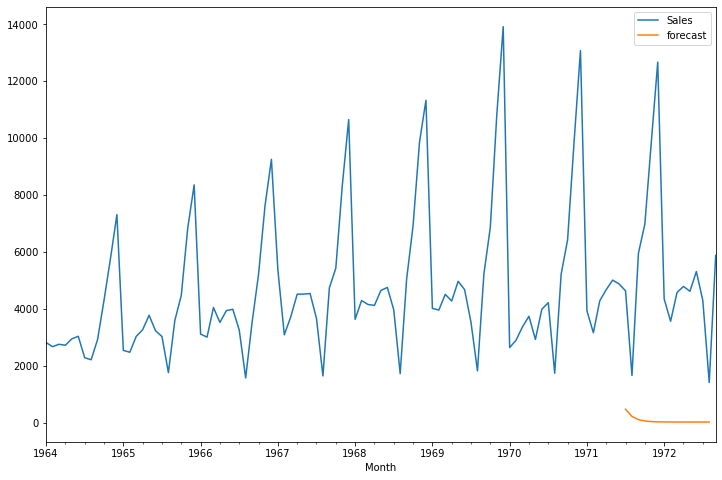

In [54]:
df['forecast'] = model1_fit.predict(start = 90, end = 103, dynamic = True)
df[['Sales', 'forecast']].plot(figsize = (12,8))

We cans see the prediction from ARIMA model is not very good so we can conclude that ARIMA model is not suitable for seasonal data

In [55]:
import statsmodels.api as sm

In [56]:
model2 = sm.tsa.statespace.SARIMAX(df['Sales'], order = (1,1,1), seasonal_order = (1,1,1,12))

model2_fit = model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

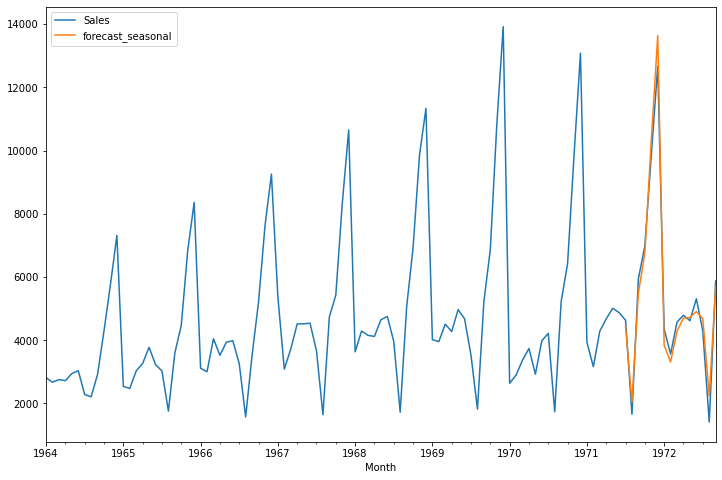

In [58]:
df['forecast_seasonal'] = model2_fit.predict(start = 90, end = 104, dynamic = True)
df[['Sales','forecast_seasonal']].plot(figsize = (12,8))

In [61]:
from pandas.tseries.offsets import DateOffset



In [63]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24)]
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [64]:
future_dates_df.tail()

,Sales,seasonal 1st diff,forecast,forecast_seasonal
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [65]:
future_df = pd.concat([df, future_dates_df])

<AxesSubplot:>

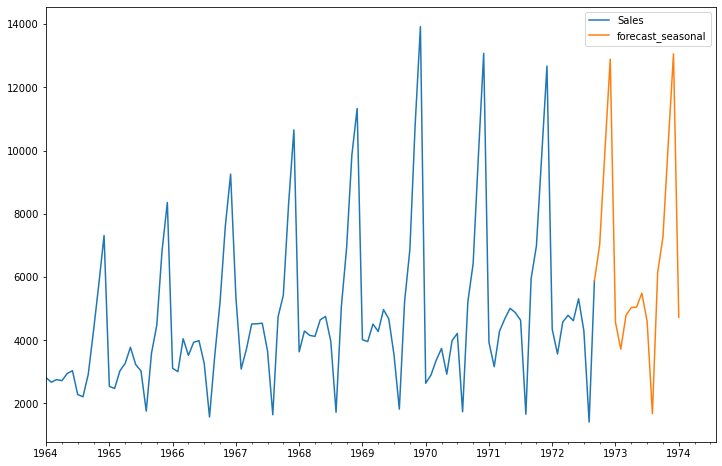

In [66]:
future_df['forecast_seasonal'] = model2_fit.predict(start = 104, end = 120, dynamic = True)
future_df[['Sales','forecast_seasonal']].plot(figsize=(12,8))